In [2]:
import pandas as pd 
import yfinance as yf
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = yf.download("SPY", start="2015-01-01", end="2023-12-31", interval="1d")

C:\Users\qevan\AppData\Local\Temp\ipykernel_4556\669196923.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("SPY", start="2015-01-01", end="2023-12-31", interval="1d")
[*********************100%***********************]  1 of 1 completed


In [4]:
# Downloading the data 
os.makedirs("data", exist_ok=True)
data.to_csv("data/spy_data.csv")

Cleaning and preprocessing

In [5]:
df = pd.read_csv("data/spy_data.csv")
df= df.drop([0,1])
df = df.rename(columns={"Price": "Date"})
df["Date"] = pd.to_datetime(df["Date"])

for col in df.select_dtypes(include="object").columns:
    df[col] = pd.to_numeric(df[col], errors="coerce")

df.head(10)

,Date,Close,High,Low,Open,Volume
2,2015-01-02,171.093643,172.301295,170.052573,171.884867,121465900
3,2015-01-05,168.003769,170.210833,167.695616,170.044264,169632600
4,2015-01-06,166.421371,168.836650,165.621824,168.311946,209151400
5,2015-01-07,168.495163,168.836637,167.304185,167.753921,125346700
6,2015-01-08,171.485153,171.701704,169.894407,169.911055,147217800
7,2015-01-09,170.110992,171.918290,169.494674,171.901629,158567300
8,2015-01-12,168.778336,170.402416,168.170354,170.244171,144396100
9,2015-01-13,168.303589,171.135295,166.995998,170.002610,214553300
10,2015-01-14,167.287506,167.487396,165.380271,166.279744,192991100
11,2015-01-15,165.755066,168.245298,165.638467,167.928821,176613900


In [6]:
df.isna().sum() # no lack

Date      0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

Feature engineering

In [7]:
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Day"] = df["Date"].dt.day_of_year
df["Day_of_week"] = df["Date"].dt.day_of_week
df["Return"] = np.log(df["Close"] / df["Close"].shift(1))
df["MA7"] = df["Close"].rolling(7, min_periods=1).mean()
df["MA30"] =df["Close"].rolling(30, min_periods=1).mean()
df["MA100"] =df["Close"].rolling(100, min_periods=1).mean()

In [8]:
df.describe()

,Date,Close,High,Low,Open,Volume,Year,Month,Day,Day_of_week,Return,MA7,MA30,MA100
count,2264,2264.000000,2264.000000,2264.000000,2264.000000,2.264000e+03,2264.000000,2264.000000,2264.000000,2264.000000,2263.000000,2264.000000,2264.000000,2264.000000
mean,2019-07-01 19:15:03.180211712,286.571158,288.141614,284.773802,286.521334,9.077790e+07,2018.996908,6.546378,183.820671,2.026502,0.000442,286.179006,284.725179,280.726975
min,2015-01-02 00:00:00,155.438873,156.492931,153.333352,154.996847,2.027000e+07,2015.000000,1.000000,2.000000,0.000000,-0.115887,158.270693,161.141201,168.495866
25%,2017-04-02 06:00:00,205.661713,206.322251,205.046114,205.887529,6.189328e+07,2017.000000,4.000000,93.000000,1.000000,-0.003800,205.724846,205.241597,198.226207
50%,2019-07-02 12:00:00,261.528290,262.676282,260.052955,261.348433,7.888170e+07,2019.000000,7.000000,184.000000,2.000000,0.000554,261.205030,259.452000,258.048304
75%,2021-09-29 06:00:00,380.329353,383.162185,377.332285,380.204665,1.050537e+08,2021.000000,10.000000,275.000000,3.000000,0.005923,380.116832,377.932825,375.482364
max,2023-12-29 00:00:00,466.564575,467.406293,466.143716,466.750542,5.072443e+08,2023.000000,12.000000,366.000000,4.000000,0.086731,464.039381,451.906629,432.545936
std,NaN,91.756129,92.339498,91.093635,91.729193,4.561883e+07,2.580989,3.424918,104.650991,1.397936,0.011439,91.556718,90.920981,89.638868


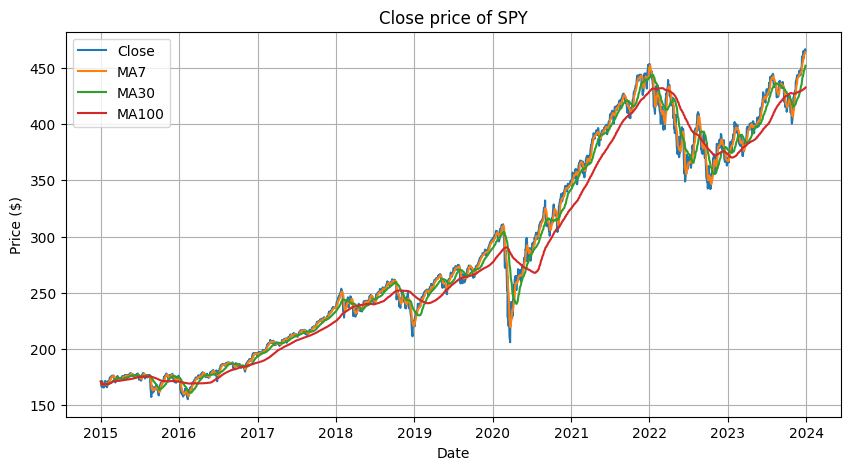

In [9]:
plt.figure(figsize=(10,5))
plt.grid()
plt.title("Close price of SPY")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.plot(df["Date"], df["Close"], label = "Close")
plt.plot(df["Date"], df["MA7"], label = "MA7")
plt.plot(df["Date"], df["MA30"], label = "MA30")
plt.plot(df["Date"], df["MA100"], label = "MA100")
plt.legend()

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   1.,   1.,
          0.,   2.,   3.,   2.,   0.,   3.,   3.,   6.,   3.,  11.,   5.,
         10.,  10.,  16.,  17.,  27.,  27.,  47.,  48.,  60., 106., 105.,
        187., 269., 295., 251., 163., 135., 119.,  81.,  71.,  61.,  33.,
         22.,  11.,   9.,  13.,   6.,   1.,   6.,   2.,   0.,   1.,   0.,
          1.,   1.,   0.,   0.,   1.,   1.,   2.,   0.,   1.,   0.,   0.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          1.]),
 array([-0.11588682, -0.11386064, -0.11183446, -0.10980829, -0.10778211,
        -0.10575593, -0.10372975, -0.10170358, -0.0996774 , -0.09765122,
        -0.09562504, -0.09359887, -0.09157269, -0.08954651, -0.08752033,
        -0.08549416, -0.08346798, -0.0814418 , -0.07941562, -0.07738945,
        -0.07536327, -0.07

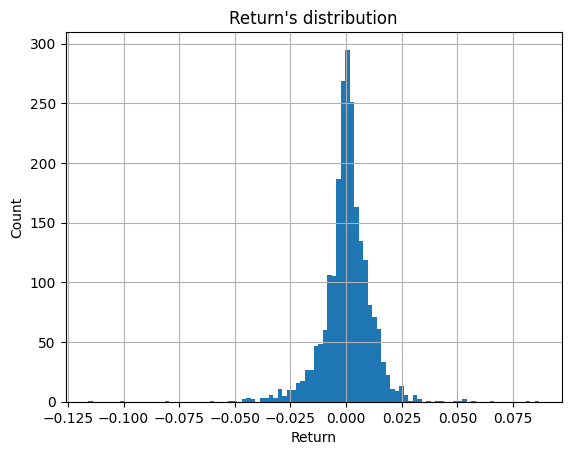

In [10]:
plt.grid()
plt.xlabel("Return")
plt.ylabel("Count")
plt.title("Return's distribution")
plt.hist(df["Return"], bins=100)


In [11]:
df["signal"] = 0
df.loc[df["MA30"] > df["MA100"], "signal"] = 1
df.loc[df["MA30"] < df["MA100"], "signal"] = -1

# Strategy's return
df["Strategy"] = df["signal"].shift(1) * df["Return"]

df["Cum_buyhold"] = df["Return"].cumsum().apply(np.exp)
df["Cum_strategy"] = df["Strategy"].cumsum().apply(np.exp)


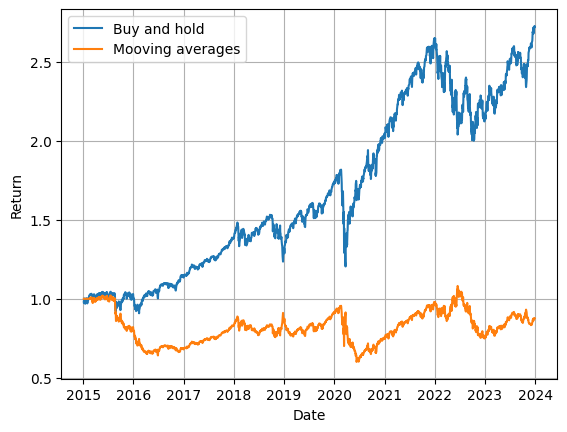

In [12]:
plt.grid()
plt.plot(df["Date"], df["Cum_buyhold"], label = "Buy and hold")
plt.plot(df["Date"], df["Cum_strategy"], label = "Mooving averages")
plt.xlabel("Date")
plt.ylabel("Return")
plt.legend()